In [ ]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [34]:
path = "./Dataset"
images = [] #list gambar
class_list = [] #list katgori gambar
label_class = ["Broccoli", "Carrot", "Cucumber", "Tomato"] #jenis kategori

# Normalisasi image
1. normalisasi pixel
2. samain semua ukuran
3. augmentasi = ngasih varian lain dari 1 gambar

In [35]:
#looping directory
for i, label in enumerate(label_class):
    img_dir = os.path.join(path, label)
    for j, img in enumerate(os.listdir(img_dir)):
        img_path = os.path.join(img_dir, img) 
        image = load_img(img_path, target_size=(200, 200)) #load image
        image = img_to_array(image) #jadi array
        image = tf.image.rgb_to_grayscale(image) #jadiin grayscale
        image = image/255.0 #normalisasi
        images.append(image)
        class_list.append(i)
        if j > 500:
            break


In [36]:
y = tf.keras.utils.to_categorical(class_list, num_classes=len(label_class))
y
x = np.asarray(images)

In [37]:
#70 : 15 : 15
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# Parameter di model CNN
A. Convolutional layer:
    1. filter (16) : total varian output
    2. kernel size : ukuran kernel/flter yang diapply ke tiap pixel
    3. strides : behavior kernel kalau udah sampe ujung gambar
    4. paddng : ngisi kekosongan di gambar (biasanya kalau kernel udh di ujung gmbar)
    5. activation : activation function
    6. input shpe: ukuran dimensi gambar yang masuk

B. Pooling layer
    1. pool size : mau dibagi berapa dimensinya

In [38]:
#conv : pool : covs : pool : flatten
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu", input_shape = (200, 200, 1)),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(16, kernel_size = (3, 3), strides = (1, 1), padding = "same", activation = "relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(len(label_class), activation="softmax") #jumlah perception ngikutin jumlah label, activation pake softmax
])

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "categorical_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

In [40]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience = 3)

In [41]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50, callbacks = early_stopping)

Epoch 1/50
44/44 [==============================] - 33s 728ms/step - loss: 1.2574 - accuracy: 0.4079 - val_loss: 1.0367 - val_accuracy: 0.5600
Epoch 2/50
44/44 [==============================] - 24s 544ms/step - loss: 0.7070 - accuracy: 0.7514 - val_loss: 0.4953 - val_accuracy: 0.8433
Epoch 3/50
44/44 [==============================] - 21s 478ms/step - loss: 0.3996 - accuracy: 0.8543 - val_loss: 0.4069 - val_accuracy: 0.8733
Epoch 4/50
44/44 [==============================] - 20s 462ms/step - loss: 0.2857 - accuracy: 0.9021 - val_loss: 0.3756 - val_accuracy: 0.8633
Epoch 5/50
44/44 [==============================] - 20s 444ms/step - loss: 0.2177 - accuracy: 0.9200 - val_loss: 0.4006 - val_accuracy: 0.8567
Epoch 6/50
44/44 [==============================] - 20s 450ms/step - loss: 0.1757 - accuracy: 0.9443 - val_loss: 0.3584 - val_accuracy: 0.8667
Epoch 7/50
44/44 [==============================] - 20s 445ms/step - loss: 0.1600 - accuracy: 0.9400 - val_loss: 0.3959 - val_accuracy: 0.8533

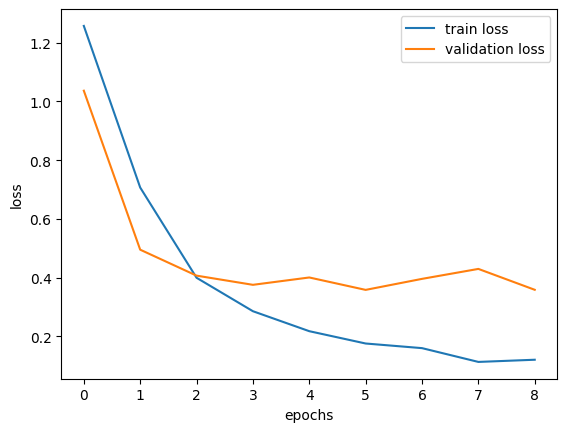

In [42]:
plt.plot(history.history["loss"], label = "train loss")
plt.plot(history.history["val_loss"], label = "validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

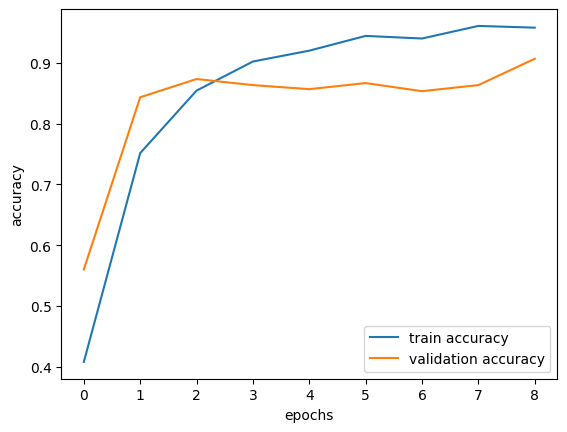

In [43]:
plt.plot(history.history["accuracy"], label = "train accuracy")
plt.plot(history.history["val_accuracy"], label = "validation accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [44]:
loss, arc = model.evaluate(x_test, y_test)

10/10 [==============================] - 1s 114ms/step - loss: 0.4372 - accuracy: 0.8833


In [ ]:
model.save("cnn.h5")